In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm

In [2]:
# Definamos el sistema usando una lista
G = np.array([lambda x,y,z: 2*x - y -2,
     lambda x,y,z: x + 2*y - 1 ,
     lambda x,y,z: x + y - 4])

In [3]:
def GetVectorG(G,r):
    
    dim = len(G)
    
    v = np.zeros( dim )
    
    for i in range(dim):
        v[i] = G[i](r[0],r[1],r[2])
    
    return v

In [4]:
GetVectorG(G,[0,0,0])

array([-2., -1., -4.])

In [5]:
def GetF(G,r):
    v = GetVectorG(G,r)
    # Calculando la funcion, que es el valor medio de la norma del vector de funciones   
    return 0.5*np.sum( v**2 )

In [6]:
GetF(G,[0.,0.,0.])

10.5

In [7]:
def GetJacobian(G,r,h=0.0001):
    
    dim = len(G)
    
    J = np.zeros((dim,dim))
    
    for i in range(dim):
        J[i,0] = (G[i](r[0]+h,r[1],r[2]) - G[i](r[0]-h,r[1],r[2]))/(2*h)  
        J[i,1] = (G[i](r[0],r[1]+h,r[2]) - G[i](r[0],r[1]-h,r[2]))/(2*h) 
        J[i,2] = (G[i](r[0],r[1],r[2]+h) - G[i](r[0],r[1],r[2]-h))/(2*h) 
    
    # Debemos retornar la traspuesta del Jacobiano, que representa el gradiente de la función vectorial
    return J.T

In [8]:
J = GetJacobian(G,[0,0,0])
print(J)

[[ 2.  1.  1.]
 [-1.  2.  1.]
 [ 0.  0.  0.]]


In [20]:
def GetSolve(G,r,lr=0.0001,error=1e-10, itmax = int(1e7)):
    
    it = 0
    d = 1.
    
    F = []
    
    while d > error and it < itmax:
        
        
        
        it += 1
        
        CurrentF = GetF(G,r)
        
        J = GetJacobian(G,r)
        GVector = GetVectorG(G,r)
        
        # Actualizamos la solución en contra del gradiente
        r -= lr*np.dot(J,GVector) 
        
        NewF = GetF(G,r)

        F.append(NewF)
        
        # Actualizamos la distancia en el Rn
        d = np.abs(CurrentF-NewF)/NewF
        
    if it == itmax:
        print('convergencia no alcanzada')
    
    return r,it,F

In [21]:
# Vamos a realizar el descenso de gradiente
r = np.zeros(len(G)) 
xsol,it,F = GetSolve(G,r)
print(xsol,it)

[1.42829756 0.42880057 0.        ] 15186


In [22]:
np.round(GetVectorG(G,r),3)

array([ 0.428,  1.286, -2.143])

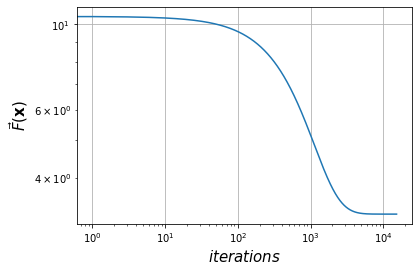

In [23]:
plt.plot(F)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$iterations$', fontsize=15)
plt.ylabel(r'$\vec{F}(\mathbf{x})$', fontsize=15)
plt.grid()